In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

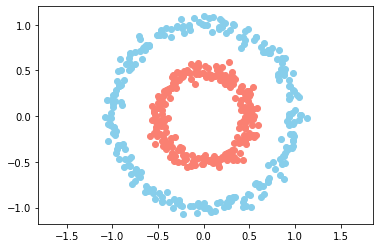

In [2]:
# CREATE DATASET

# NUMBER OF DATA
n = 500

# NUMBER OF CHARACTERISTICS
p = 2

# DATASET (INPUT/OUTPUT)
# MOVE FACTOR TO VISUALIZE THE DISTANCE BETWEEN CIRCLES
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) 

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [3]:
# OBJETIVE: THE NEURAL NETWORK MUST CLASSIFY BOTH SETS OF POINTS

# CLASS REPRESENTATING THE NEURAL NETWORK LAYER
class NeuralLayer():
  def __init__(self, number_connections, number_neurons, activation_function):
    self.activation_function = activation_function
    self.b = np.random.rand(1, number_neurons) * 2 - 1
    self.W = np.random.rand(number_connections, number_neurons) * 2 - 1

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

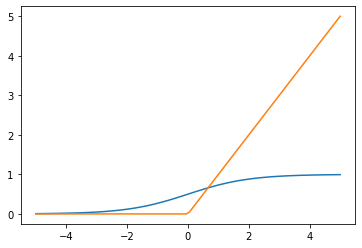

In [4]:
# ACTIVATIONS FUNCTIONS

# SIGMOID FUNCTION AND ITS DERIVATE
sigmoid = (lambda x: 1 / (1 + np.e ** (-x)),
           lambda x: x * (1 - x))

# RELU FUNCTION

relu = lambda x: np.maximum(0, x)

# RETURNS 100 VALUES BETWEEN - 5 AND 5
_x = np.linspace(-5, 5, 100)
print(_x)

# SIGMOID PLOT FOR THE 100 DATA
plt.plot(_x, sigmoid[0](_x))

# RELU PLOT FOR THE 100 DATA
plt.plot(_x, relu(_x))

In [5]:
# CREATE NEURAL NETWORK
def create_neuron(toplogy, activation_function):
  neural_network = []
  for l, layer in enumerate(toplogy[:-1]):
    neural_network.append(NeuralLayer(toplogy[l], toplogy[l+1], activation_function))
  return neural_network

# NEURONAL NETWORK TOPOLOGY (NUMBER OF NEURONS BY LAYER)
toplogy = [p, 4, 8, 16, 8, 4, 1]

# THE NEURAL NETWORK
neural_network = create_neuron(toplogy, sigmoid)
print(neural_network)

[<__main__.NeuralLayer object at 0x7f1ef7d11fd0>, <__main__.NeuralLayer object at 0x7f1ef7d11ed0>, <__main__.NeuralLayer object at 0x7f1ef7d11f50>, <__main__.NeuralLayer object at 0x7f1ef7d11b50>, <__main__.NeuralLayer object at 0x7f1ef7d11e10>, <__main__.NeuralLayer object at 0x7f1ef7d11d10>]


In [7]:
# THE NEURAL NETWORK
toplogy = [p, 4, 8, 1]
neural_network = create_neuron(toplogy, sigmoid)

# TRAINING DATA FUNCTION

# COST FUNCTION AND ITS DERIVATE
mean_square_error = (lambda Y_predict, Y_real: np.mean((Y_predict - Y_real) ** 2),
                     lambda Y_predict, Y_real: (Y_predict - Y_real))

def train(neural_network, X, Y, mean_square_error, learning_rate=0.5, train=True):
  out = [(None, X)]
  # FORWARD PASS
  # @ = MATRIX MULTIPLICATION
  for l, layer in enumerate(neural_network):  
    weight_sum = out[-1][1] @ neural_network[l].W + neural_network[l].b
    activation = neural_network[l].activation_function[0](weight_sum)
    out.append((weight_sum, activation))

  if train:
    # BACKWARD PASS
    deltas = []
    for l in reversed(range(0, len(neural_network))):
      weight_sum = out[l+1][0]
      activation = out[l+1][1]
      if l == len(neural_network) - 1:
        # CALCULATE DELTA OF THE LAST LAYER
        deltas.insert(0, mean_square_error[1](activation, Y) * neural_network[l].activation_function[1](activation))
      else:
        # CALCULATE DELTA OF THE PREVIOUS LAYER
        deltas.insert(0, deltas[0] @ _W.T * neural_network[l].activation_function[1](activation))
      _W = neural_network[l].W
      # GRADIENT DESCENT
      neural_network[l].b = neural_network[l].b - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate
      neural_network[l].W = neural_network[l].W - out[l][1].T @ deltas[0] * learning_rate
  return out[-1][1]

train(neural_network, X, Y, mean_square_error, 0.5)
print("")

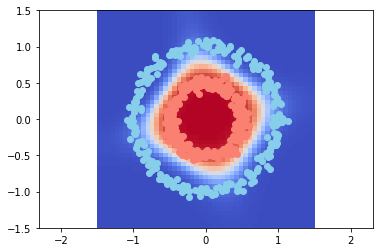

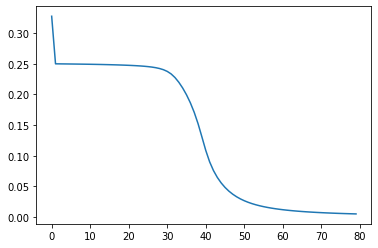

In [14]:
# TRAINING LOOP

import time
from IPython.display import clear_output

neural_network = create_neuron(toplogy, sigmoid)

loss = []

for i in range(2000):
  # TRAINING NETWORK
  pY = train(neural_network, X, Y, mean_square_error, learning_rate=0.01)

  if i % 25 == 0:
    print(pY)
    loss.append(mean_square_error[0](pY, Y))
    resolution = 50
    _x0 = np.linspace(-1.5, 1.5, resolution)
    _x1 = np.linspace(-1.5, 1.5, resolution)
    _Y = np.zeros((resolution, resolution))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_network, np.array([[x0, x1]]), Y, mean_square_error, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)